In [ ]:
!pip install pymongo[srv] --quiet
!pip install imblearn --quiet
!pip install vizpool --quiet
!pip install xgboost --quiet
!pip install hyperopt --quiet
%pip install mlflow --quiet

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-61d49730-b0b8-438a-95d3-0f1ff26a1e14/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-61d49730-b0b8-438a-95d3-0f1ff26a1e14/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-61d49730-b0b8-438a-95d3-0f1ff26a1e14/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-61d49730-b0b8-438a-95d3-0f1ff26a1e14/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-61d49730-b0b8-438a-95d3-0f1ff26a1e14/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.
Python interpreter will be restarted.


In [ ]:
# End to End Project traning and deployement with databricks
import pymongo
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from vizpool.static import EDA
import os

In [ ]:
client = pymongo.MongoClient("MONGO_DB_URL")
MONGO_DATABASE_NAME = os.environ["MONGO_DATABASE_NAME"]
collection = client[MONGO_DATABASE_NAME]["car"]

df = pd.DataFrame(list(collection.find()))
if "_id" in df.columns.to_list():
    df = df.drop(columns=["_id"], axis=1)

df.replace({"na": np.nan}, inplace=True)
df.describe(include = 'all').T

,count,unique,top,freq
class,35001,2,neg,33373
aa_000,35001,13835,14,559
ab_000,8006,21,0,6426
ac_000,32675,1623,0,5259
ad_000,25819,1486,0,1139
...,...,...,...,...
ee_007,34641,16720,0,4558
ee_008,34641,13414,0,9835
ee_009,34641,6082,0,18450
ef_000,33138,19,0,32966


In [ ]:
df = df.infer_objects()
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if feature != 'class']
categorical_features = [feature for feature in df.columns if feature == 'class']

df[numeric_features] = df[numeric_features].apply(pd.to_numeric)
df[categorical_features] = df[categorical_features].astype('category')

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 170 numerical features : ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000'

In [ ]:
sensor_eda = EDA(df)

Out[13]: <module 'matplotlib.pyplot' from '/databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py'><Figure size 1296x432 with 0 Axes>

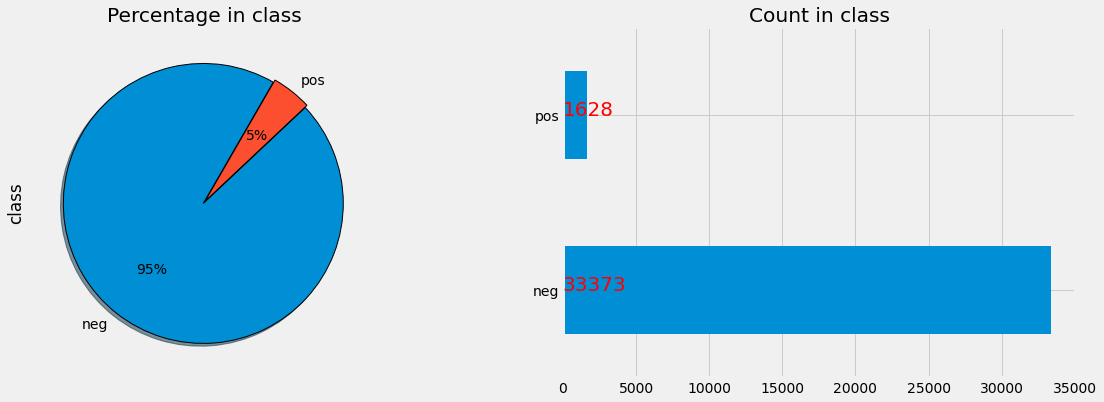

In [ ]:
sensor_eda.pie_bar(hue='class')

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
class,35001,2,neg,33373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aa_000,35001.0,NaN,NaN,NaN,77867.476301,191478.987758,0.0,922.0,31510.0,55180.0,2746564.0
ab_000,8006.0,NaN,NaN,NaN,0.766175,3.532738,0.0,0.0,0.0,0.0,100.0
ac_000,32675.0,NaN,NaN,NaN,350760003.077582,790159644.865681,0.0,16.0,156.0,1000.0,2130706664.0
ad_000,25819.0,NaN,NaN,NaN,332939.763585,53423832.576111,0.0,26.0,132.0,444.0,8584297742.0
...,...,...,...,...,...,...,...,...,...,...,...
ee_007,34641.0,NaN,NaN,NaN,411108.33215,1828186.749186,0.0,130.0,46354.0,177158.0,37278556.0
ee_008,34641.0,NaN,NaN,NaN,165619.171271,592370.191161,0.0,0.0,5192.0,145264.0,19267396.0
ee_009,34641.0,NaN,NaN,NaN,9553.85803,55440.47725,0.0,0.0,0.0,2000.0,3810078.0
ef_000,33138.0,NaN,NaN,NaN,0.079908,3.297541,0.0,0.0,0.0,0.0,350.0


In [ ]:
class TargetValueMapping:
    def __init__(self):
        self.neg: int = 0

        self.pos: int = 1

    def to_dict(self):
        return self.__dict__

    def reverse_mapping(self):
        mapping_response = self.to_dict()

        return dict(zip(mapping_response.values(), mapping_response.keys()))

In [ ]:
X = df.drop(["class"], axis=1)
y = df["class"].replace(TargetValueMapping().to_dict())

# Split out the training data
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)
 
# Split the remaining data equally into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)
print(X_train.shape, X_rem.shape, y_train.shape, y_rem.shape)

(21000, 170) (14001, 170) (21000,) (14001,)


Out[17]: <module 'matplotlib.pyplot' from '/databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py'><Figure size 1296x432 with 0 Axes>

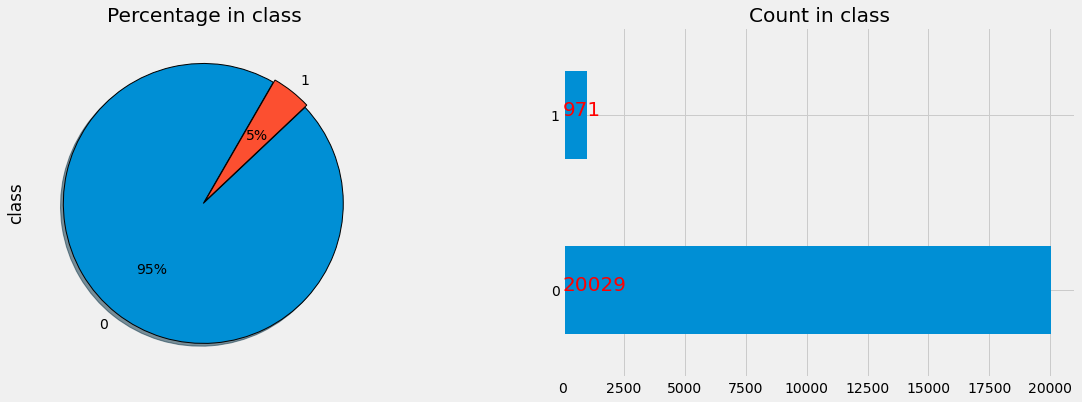

In [ ]:
x_train_eda = EDA(pd.DataFrame(y_train, columns=['class']))
x_train_eda.pie_bar(hue="class")

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X_train)

In [ ]:
print(X_train.shape, y_train.shape)
oversample = SMOTE()
X_train_oversamp, y_train_oversamp = oversample.fit_resample(X_train, y_train)
print(X_train_oversamp.shape, y_train_oversamp.shape)
X_train_oversamp = pd.DataFrame(X_train_oversamp, columns = numeric_features)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0a56bf8820>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
(21000, 170) (21000,)
(40058, 170) (40058,)


In [ ]:
X_train_oversamp.shape, y_train_oversamp.shape

Out[20]: ((40058, 170), (40058,))

Out[21]: <module 'matplotlib.pyplot' from '/databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py'><Figure size 1296x432 with 0 Axes>

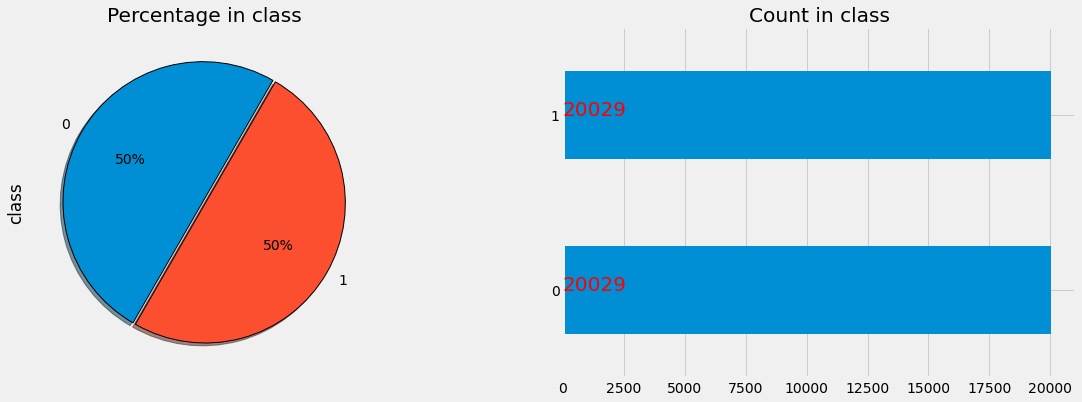

In [ ]:
x_train_eda = EDA(pd.DataFrame(y_train_oversamp, columns=['class']))
x_train_eda.pie_bar(hue="class")

In [ ]:
from sklearn.pipeline import Pipeline
from joblib import Memory
from sklearn.compose import ColumnTransformer
memory = Memory(location='cachedir')


numeric_transformer = Pipeline(steps=[
                                    ('num_imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                                    ('scaler', StandardScaler())
                                    ])
col_transformer = ColumnTransformer(transformers=[
                                    ('num_processing', numeric_transformer, numeric_features),
                                ], remainder='drop')

prep_pipeline = Pipeline(steps=[
                                ('col_transformer', col_transformer)
                                ], memory=memory)

prep_pipeline

Pipeline(memory=Memory(location=cachedir/joblib),
 steps=[('col_transformer',
 ColumnTransformer(transformers=[('num_processing',
 Pipeline(steps=[('num_imputer',
 SimpleImputer()),
 ('scaler',
 StandardScaler())]),
 ['aa_000', 'ab_000', 'ac_000',
 'ad_000', 'ae_000', 'af_000',
 'ag_000', 'ag_001', 'ag_002',
 'ag_003', 'ag_004', 'ag_005',
 'ag_006', 'ag_007', 'ag_008',
 'ag_009', 'ah_000', 'ai_000',
 'aj_000', 'ak_000', 'al_000',
 'am_0', 'an_000', 'ao_000',
 'ap_000', 'aq_000', 'ar_000',
 'as_000', 'at_000', 'au_000', ...])]))]) In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook. On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org. Pipeline Pipeline(memory=Memory(location=cachedir/joblib),
 steps=[('col_transformer',
 ColumnTransformer(transformers=[('num_processing',
 Pipeline(steps=[('num_imputer',
 SimpleImputer()),
 ('scaler',
 StandardScaler())]),
 ['aa_000', 'ab_000', 'ac_000',
 'ad_000', 'ae_000', 'af_000',
 'ag_000', 'ag_001', 'ag_002',
 'ag_003', 'ag_004', 'ag_005',
 'ag_006', 'ag_007', 'ag_008',
 'ag_009', 'ah_000', 'ai_000',
 'aj_000', 'ak_000', 'al_000',
 'am_0', 'an_000', 'ao_000',
 'ap_000', 'aq_000', 'ar_000',
 'as_000', 'at_000', 'au_000', ...])]))]) col_transformer: ColumnTransformer ColumnTransformer(transformers=[('num_processing',
 Pipeline(steps=[('num_imputer',
 SimpleImputer()),
 ('scaler', StandardScaler())]),
 ['aa_000', 'ab_000', 'ac_000', 'ad_000',
 'ae_000', 'af_000', 'ag_000', 'ag_001',
 'ag_002', 'ag_003', 'ag_004', 'ag_005',
 'ag_006', 'ag_007', 'ag_008', 'ag_009',
 'ah_000', 'ai_000', 'aj_000', 'ak_000',
 'al_000', 'am_0', 'an_000', 'ao_000',
 'ap_000', 'aq_000', 'ar_000', 'as_000',
 'at_000', 'au_000', ...])]) num_processing ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'co_000', 'cp_000', 'cq_000', 'cr_000', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000'] SimpleImputer SimpleImputer() StandardScaler StandardScaler()

In [ ]:
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlflow.models.signature import infer_signature
from mlflow.utils.environment import _mlflow_conda_env
import cloudpickle
import time

In [ ]:
# The predict method of sklearn's RandomForestClassifier returns a binary classification (0 or 1). 
# The following code creates a wrapper function, SklearnModelWrapper, that uses 
# the predict_proba method to return the probability that the observation belongs to each class. 
 
class SklearnModelWrapper(mlflow.pyfunc.PythonModel):
  def __init__(self, model):
    self.model = model
    
  def predict(self, context, model_input):
    return self.model.predict(model_input)
 
# mlflow.start_run creates a new MLflow run to track the performance of this model. 
# Within the context, you call mlflow.log_param to keep track of the parameters used, and
# mlflow.log_metric to record metrics like accuracy.
with mlflow.start_run(run_name='untuned_random_forest'):
  n_estimators = 20
  model = Pipeline([
      ('preprocessing', prep_pipeline),
      ('classifier', RandomForestClassifier(n_estimators=n_estimators, random_state=np.random.RandomState(123)))
                    ])
  model.fit(X_train_oversamp, y_train_oversamp)
 
  # predict_proba returns [prob_negative, prob_positive], so slice the output with [:, 1]
  predictions_test = model.predict(X_test)
  auc_score = roc_auc_score(y_test, predictions_test)
  mlflow.log_param('n_estimators', n_estimators)
  # Use the area under the ROC curve as a metric.
  mlflow.log_metric('auc', auc_score)
  wrappedModel = SklearnModelWrapper(model)
  # Log the model with a signature that defines the schema of the model's inputs and outputs. 
  # When the model is deployed, this signature will be used to validate inputs.
  signature = infer_signature(X_train_oversamp, wrappedModel.predict(None, X_train_oversamp))
  
  # MLflow contains utilities to create a conda environment used to serve models.
  # The necessary dependencies are added to a conda.yaml file which is logged along with the model.
  conda_env =  _mlflow_conda_env(
        additional_conda_deps=None,
        additional_pip_deps=["cloudpickle=={}".format(cloudpickle.__version__), "scikit-learn=={}".format(sklearn.__version__)],
        additional_conda_channels=None,
    )
  mlflow.pyfunc.log_model("random_forest_model", python_model=wrappedModel, conda_env=conda_env, signature=signature)

In [ ]:
feature_importances = pd.DataFrame(model["classifier"].feature_importances_, index=X_train_oversamp.columns.tolist(), columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

,importance
bu_000,0.061024
aa_000,0.058846
ck_000,0.057453
bj_000,0.055438
bt_000,0.054855
...,...
eg_000,0.000123
dz_000,0.000122
ef_000,0.000096
ag_000,0.000064


In [ ]:
## Registering the model
runs = mlflow.search_runs(filter_string='tags.mlflow.runName = "untuned_random_forest"')
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.auc,params.n_estimators,tags.mlflow.databricks.cluster.id,tags.mlflow.databricks.notebookRevisionID,...,tags.mlflow.databricks.notebookPath,tags.mlflow.source.name,tags.mlflow.runName,tags.mlflow.databricks.notebookID,tags.mlflow.source.type,tags.mlflow.log-model.history,tags.mlflow.databricks.cluster.info,tags.mlflow.databricks.notebook.commandID,tags.mlflow.databricks.webappURL,tags.mlflow.databricks.cluster.libraries
0,2a5cfc8b462b4b5a97eeb995e576f2df,2742713296793020,FINISHED,dbfs:/databricks/mlflow-tracking/2742713296793...,2023-02-11 05:02:22.632000+00:00,2023-02-11 05:03:33.328000+00:00,0.964781,100,0211-021200-l3uja5mu,1676091813588,...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,untuned_random_forest,2742713296793020,NOTEBOOK,"[{""artifact_path"":""random_forest_model"",""signa...","{""cluster_name"":""sensor-fault-detection-cluste...",1208785061065475563_5065057239970760539_b70985...,https://asia-northeast1.gcp.databricks.com,"{""installable"":[],""redacted"":[]}"
1,289b1ac33e254aa780859ef4f3bc64c4,2742713296793020,FINISHED,dbfs:/databricks/mlflow-tracking/2742713296793...,2023-02-11 04:48:07.539000+00:00,2023-02-11 04:49:16.964000+00:00,0.964781,100,0211-021200-l3uja5mu,1676090957204,...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,untuned_random_forest,2742713296793020,NOTEBOOK,"[{""artifact_path"":""random_forest_model"",""signa...","{""cluster_name"":""sensor-fault-detection-cluste...",1208785061065475563_6745401671452481634_165ac8...,https://asia-northeast1.gcp.databricks.com,"{""installable"":[],""redacted"":[]}"
2,4fe493a382484ab38c0227e9b372b9bc,2742713296793020,FINISHED,dbfs:/databricks/mlflow-tracking/2742713296793...,2023-02-11 04:47:37.319000+00:00,2023-02-11 04:47:49.520000+00:00,0.942508,10,0211-021200-l3uja5mu,1676090869785,...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,untuned_random_forest,2742713296793020,NOTEBOOK,"[{""artifact_path"":""random_forest_model"",""signa...","{""cluster_name"":""sensor-fault-detection-cluste...",1208785061065475563_8092804605960647424_e2ae69...,https://asia-northeast1.gcp.databricks.com,"{""installable"":[],""redacted"":[]}"
3,2a33becf8dd745cd8caed03233f7aba0,2742713296793020,FAILED,dbfs:/databricks/mlflow-tracking/2742713296793...,2023-02-11 04:46:47.763000+00:00,2023-02-11 04:47:00.595000+00:00,0.942508,10,0211-021200-l3uja5mu,1676090820975,...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,untuned_random_forest,2742713296793020,NOTEBOOK,None,"{""cluster_name"":""sensor-fault-detection-cluste...",1208785061065475563_4777793581951291925_d19164...,https://asia-northeast1.gcp.databricks.com,"{""installable"":[],""redacted"":[]}"
4,b783a95d65144e9ca2706b3e00484ff0,2742713296793020,FAILED,dbfs:/databricks/mlflow-tracking/2742713296793...,2023-02-11 04:43:31.857000+00:00,2023-02-11 04:43:32.609000+00:00,NaN,None,0211-021200-l3uja5mu,1676090612873,...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,untuned_random_forest,2742713296793020,NOTEBOOK,None,"{""cluster_name"":""sensor-fault-detection-cluste...",1208785061065475563_5549279705560186964_866bdb...,https://asia-northeast1.gcp.databricks.com,"{""installable"":[],""redacted"":[]}"
5,0d0f8941d5f5496486f8bc6e59b08291,2742713296793020,FAILED,dbfs:/databricks/mlflow-tracking/2742713296793...,2023-02-11 04:41:30.986000+00:00,2023-02-11 04:41:42.673000+00:00,NaN,None,0211-021200-l3uja5mu,1676090503090,...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,/Users/hasnainmehmood3435@gmail.com/sensorFaul...,untuned_random_forest,2742713296793020,NOTEBOOK,None,"{""cluster_name"":""sensor-fault-detection-cluste...",1208785061065475563_8101353645804946585_59a460...,https://asia-northeast1.gcp.databr

In [ ]:
run_id = mlflow.search_runs(filter_string='tags.mlflow.runName = "untuned_random_forest"').iloc[0].run_id
run_id

Out[62]: '2a5cfc8b462b4b5a97eeb995e576f2df'

In [ ]:
model_name = "sensor-fault-detection"

In [ ]:
model_name = "sensor-fault-detection"
model_version = mlflow.register_model(f"runs:/{run_id}/random_forest_model", model_name)

Registered model 'sensor-fault-detection' already exists. Creating a new version of this model...
2023/02/11 05:03:59 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sensor-fault-detection, version 2
Created version '2' of model 'sensor-fault-detection'.


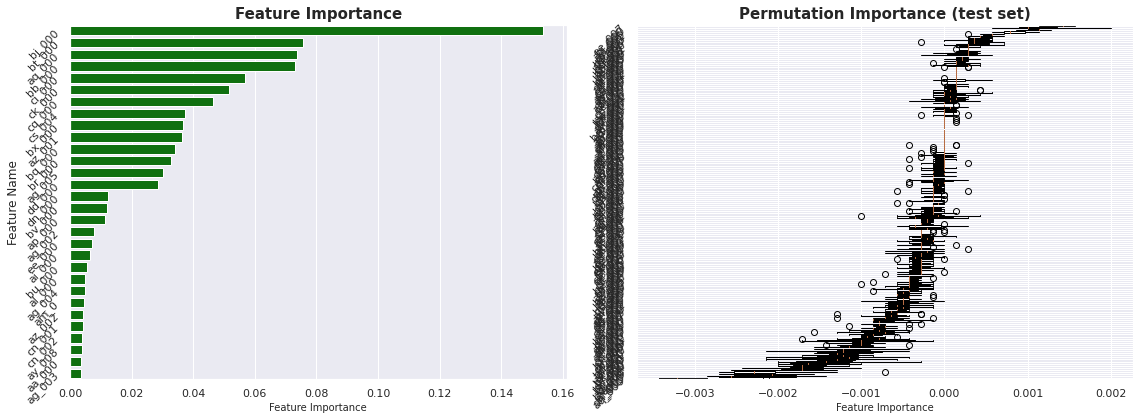

In [ ]:
from vizpool.static import Evaluation
model_eval = Evaluation(y_test)
model_eval.feature_importance(model, X_val= X_test, pipeline=True,
                              height=6, width = 16);

In [ ]:
# Test predictions
test_predicted = model.predict(X_test)
test_predicted

Out[80]: array([0, 0, 0, ..., 0, 0, 0])

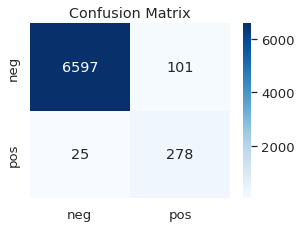

In [ ]:
# Confusion matrix with Count
model_eval.confusion_matrix(test_predicted, target_names=['neg', 'pos'],
                            height=3, width=4, normalize = False);

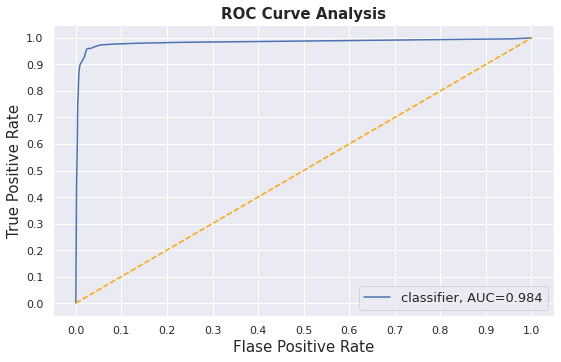

In [ ]:
model_eval.auc_roc_plot(X_test, [model],
                        ['classifier'],
                        height=5, width = 8);

In [ ]:
## pushing to production
from mlflow.tracking import MlflowClient
 
client = MlflowClient()
client.transition_model_version_stage(
  name=model_name,
  version=model_version.version,
  stage="Production",
)

Out[64]: <ModelVersion: creation_timestamp=1676091838789, current_stage='Production', description='', last_updated_timestamp=1676091850442, name='sensor-fault-detection', run_id='2a5cfc8b462b4b5a97eeb995e576f2df', run_link='', source='dbfs:/databricks/mlflow-tracking/2742713296793020/2a5cfc8b462b4b5a97eeb995e576f2df/artifacts/random_forest_model', status='READY', status_message='', tags={}, user_id='4309239372643230', version='2'>

In [ ]:
model = mlflow.pyfunc.load_model(f"models:/{model_name}/production")
X_test[numeric_features] = X_test[numeric_features].astype(float)
# Sanity-check: This should match the AUC logged by MLflow
print(f'AUC: {roc_auc_score(y_test, model.predict(X_test))}')

/local_disk0/.ephemeral_nfs/envs/pythonEnv-f36c049f-4fd0-4fde-a36f-4177179a9b6a/lib/python3.9/site-packages/mlflow/models/utils.py:453: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_pf_input[x] = _enforce_mlflow_datatype(x, pf_input[x], input_types[i])
/local_disk0/.ephemeral_nfs/envs/pythonEnv-f36c049f-4fd0-4fde-a36f-4177179a9b6a/lib/python3.9/site-packages/mlflow/models/utils.py:453: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_pf_input[x] = _enforce_mlflow_datatype(x, pf_input[x], input_types[i])
/local_disk0/.epheme

In [ ]:
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
from hyperopt.pyll import scope
from math import exp
import mlflow.xgboost
import numpy as np
import xgboost as xgb

In [ ]:
search_space = {
  'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
  'learning_rate': hp.loguniform('learning_rate', -3, 0),
  'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
  'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
  'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
  'objective': 'binary:logistic',
  'seed': 123, # Set a seed for deterministic training
}
 
def train_model(params):
  # With MLflow autologging, hyperparameters and the trained model are automatically logged to MLflow.
  mlflow.xgboost.autolog()
  with mlflow.start_run(nested=True):
    train = xgb.DMatrix(data=X_train_oversamp, label=y_train_oversamp)
    validation = xgb.DMatrix(data=X_test, label=y_test)
    # Pass in the validation set so xgb can track an evaluation metric. XGBoost terminates training when the evaluation metric
    # is no longer improving.
    booster = xgb.train(params=params, dtrain=train, num_boost_round=1000,\
                        evals=[(validation, "validation")], early_stopping_rounds=50)
    validation_predictions = booster.predict(validation)
    auc_score = roc_auc_score(y_test, validation_predictions)
    mlflow.log_metric('auc', auc_score)
 
    signature = infer_signature(X_train_oversamp, booster.predict(train))
    mlflow.xgboost.log_model(booster, "model", signature=signature)
    
    # Set the loss to -1*auc_score so fmin maximizes the auc_score
    return {'status': STATUS_OK, 'loss': -1*auc_score, 'booster': booster.attributes()}
 
# Greater parallelism will lead to speedups, but a less optimal hyperparameter sweep. 
# A reasonable value for parallelism is the square root of max_evals.
spark_trials = SparkTrials(parallelism=10)
 
# Run fmin within an MLflow run context so that each hyperparameter configuration is logged as a child run of a parent
# run called "xgboost_models" .
with mlflow.start_run(run_name='xgboost_models'):
  best_params = fmin(
    fn=train_model, 
    space=search_space, 
    algo=tpe.suggest, 
    max_evals=96,
    trials=spark_trials,
  )

100%|██████████| 96/96 [5:25:02<00:00, 203.15s/trial, best loss: -0.9928322034950584]INFO:hyperopt-spark:Total Trials: 96: 96 succeeded, 0 failed, 0 cancelled.



In [ ]:
best_run = mlflow.search_runs(order_by=['metrics.auc DESC']).iloc[0]
print(f'AUC of Best Run: {best_run["metrics.auc"]}')

AUC of Best Run: 0.9928322034950584


In [ ]:
# Now update the imporoved model in model registry
new_model_version = mlflow.register_model(f"runs:/{best_run.run_id}/model", model_name)

Registered model 'sensor-fault-detection' already exists. Creating a new version of this model...
2023/02/11 12:25:06 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: sensor-fault-detection, version 3
Created version '3' of model 'sensor-fault-detection'.


In [ ]:
# Archive the old model version
client.transition_model_version_stage(
  name=model_name,
  version=model_version.version,
  stage="Archived"
)
 
# Promote the new model version to Production
client.transition_model_version_stage(
  name=model_name,
  version=new_model_version.version,
  stage="Production"
)

Out[95]: <ModelVersion: creation_timestamp=1676118306846, current_stage='Production', description='', last_updated_timestamp=1676118313551, name='sensor-fault-detection', run_id='6676b145c1714dd3b3f3cacbb73cbb42', run_link='', source='dbfs:/databricks/mlflow-tracking/2742713296793020/6676b145c1714dd3b3f3cacbb73cbb42/artifacts/model', status='READY', status_message='', tags={}, user_id='4309239372643230', version='3'>

In [ ]:
# Clients that call load_model now receive the new model
# This code is the same as the last block of "Building a Baseline Model". No change is required for clients to get the new model!
model = mlflow.pyfunc.load_model(f"models:/{model_name}/production")
X_test[numeric_features] = X_test[numeric_features].astype(float)
print(f'AUC: {roc_auc_score(y_test, model.predict(X_test))}')

/local_disk0/.ephemeral_nfs/envs/pythonEnv-61d49730-b0b8-438a-95d3-0f1ff26a1e14/lib/python3.9/site-packages/mlflow/models/utils.py:453: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_pf_input[x] = _enforce_mlflow_datatype(x, pf_input[x], input_types[i])
/local_disk0/.ephemeral_nfs/envs/pythonEnv-61d49730-b0b8-438a-95d3-0f1ff26a1e14/lib/python3.9/site-packages/mlflow/models/utils.py:453: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_pf_input[x] = _enforce_mlflow_datatype(x, pf_input[x], input_types[i])
/local_disk0/.epheme

In [ ]:
# Batch inference
# To simulate a new corpus of data, save the existing X_train data to a Delta table. 
# In the real world, this would be a new batch of data.
spark_df = spark.createDataFrame(X_train_oversamp)
# Replace <username> with your username before running this cell.
table_path = "dbfs:/<USER_NAME>/delta/sensor_data"
# Delete the contents of this path in case this cell has already been run
dbutils.fs.rm(table_path, True)
spark_df.write.format("delta").save(table_path)

/databricks/spark/python/pyspark/sql/pandas/conversion.py:626: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  [(c, t) for (_, c), t in zip(pdf_slice.iteritems(), arrow_types)]


In [ ]:
# Loading the model into a Spark UDF, so it can be applied to the Delta table
import mlflow.pyfunc
 
apply_model_udf = mlflow.pyfunc.spark_udf(spark, f"models:/{model_name}/production")

2023/02/11 15:19:30 WARNING mlflow.pyfunc: Calling `spark_udf()` with `env_manager="local"` does not recreate the same environment that was used during training, which may lead to errors or inaccurate predictions. We recommend specifying `env_manager="conda"`, which automatically recreates the environment that was used to train the model and performs inference in the recreated environment.
2023/02/11 15:19:30 INFO mlflow.models.flavor_backend_registry: Selected backend for flavor 'python_function'


In [ ]:
# Read the "new data" from Delta
new_data = spark.read.format("delta").load(table_path)

In [ ]:
# Deploying an endpoint
import os
os.environ["DATABRICKS_TOKEN"] = "DATABRICKS_TOKEN"

In [ ]:
# Click Models in the left sidebar and navigate to the registered wine model. Click the serving tab, and then click Enable Serving.

#Then, under Call The Model, click the Python button to display a Python code snippet to issue requests. Copy the code into this notebook. It should look similar to the code in the next cell.

#You can use the token to make these requests from outside Databricks notebooks as well.

In [ ]:
# Replace with code snippet from the model serving page
import os
import requests
import pandas as pd
 
def score_model(dataset: pd.DataFrame):
  url = f'https://<DATABRICKS_URL>/model/{model_name}/Production/invocations'
  headers = {'Authorization': f'Bearer {os.environ.get("DATABRICKS_TOKEN")}'}
  data_json = dataset.to_dict(orient='split')
  response = requests.request(method='POST', headers=headers, url=url, json=data_json)
  if response.status_code != 200:
    raise Exception(f'Request failed with status {response.status_code}, {response.text}')
  return response.json()

In [ ]:
# Model serving is designed for low-latency predictions on smaller batches of data
num_predictions = 5
served_predictions = score_model(X_test[:num_predictions])
model_evaluations = model.predict(X_test[:num_predictions])
# Compare the results from the deployed model and the trained model
pd.DataFrame({
  "Model Prediction": model_evaluations,
    "Served Model Prediction": served_predictions,
})